# Gradient Descent


Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks. 

Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates.


# Stochastic gradient descent

“Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.” This algorithm is useful in cases where the optimal points cannot be found by equating the slope of the function to 0.



# Why is Stochastic Gradient Descent needed?

Optimizing a cost function is one of the most important concepts in Machine Learning. Gradient Descent is the most common optimization algorithm and the foundation of how we train an ML model.  That's why we use a variant of this algorithm known as Stochastic Gradient Descent to make our model learn a lot faster.

# Why is stochastic gradient descent better than gradient descent?

SGD is stochastic in nature i.e it picks up a “random” instance of training data at each step and then computes the gradient making it much faster as there is much fewer data to manipulate at a single time, unlike Batch GD.

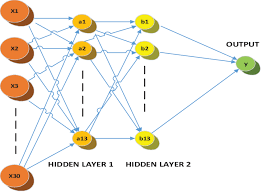

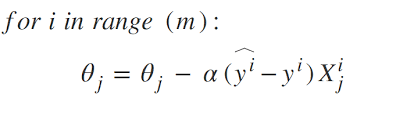


# Minibatch gradient descent
Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients. It is the most common implementation of gradient descent used in the field of deep learning.



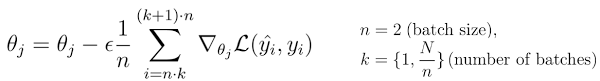

# Is stochastic gradient descent faster than Minibatch ?


SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it.

SGD is stochastic in nature i.e it picks up a “random” instance of training data at each step and then computes the gradient making it much faster as there is much fewer data to manipulate at a single time, unlike Batch GD.


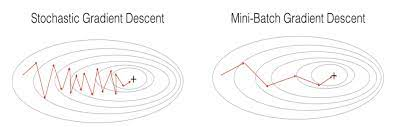

# Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset link- https://www.kaggle.com/pankajgupta054/banglorehousepricedataset?select=Bengaluru_House_Data.csv

In [2]:
df = pd.read_csv('C:/Users/deshm/Desktop/dataml/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [10]:
df2=df.drop(['area_type', 'availability', 'location','society'],axis=1)
df2

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...
13315,5 Bedroom,3453,4.0,0.0,231.00
13316,4 BHK,3600,5.0,NaN,400.00
13317,2 BHK,1141,2.0,1.0,60.00
13318,4 BHK,4689,4.0,1.0,488.00


In [14]:
df2.isnull().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

<AxesSubplot:>

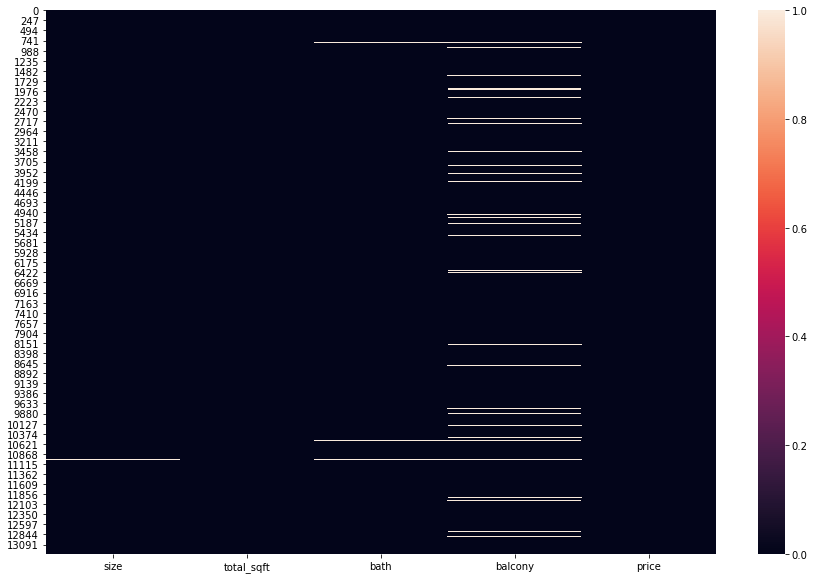

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.isnull())

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13304 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


# Numerical value

In [17]:
numerical_value=df2.select_dtypes(include=['float64'])
numerical_value.columns

Index(['bath', 'balcony', 'price'], dtype='object')

In [18]:
df2['bath'] = df2['bath'].fillna(df2['bath'].mean())
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2['price'] = df2['price'].fillna(df2['price'].mean())

# Categorical value

In [20]:
categorical_value=df2.select_dtypes(include=['object'])
categorical_value.columns

Index(['size', 'total_sqft'], dtype='object')

In [21]:
df2['size'] = df2["size"].fillna(df2['size'].mode()[0])
df2['total_sqft'] = df2["total_sqft"].fillna(df2['total_sqft'].mode()[0])

In [24]:
df2.isnull().sum()

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

<AxesSubplot:>

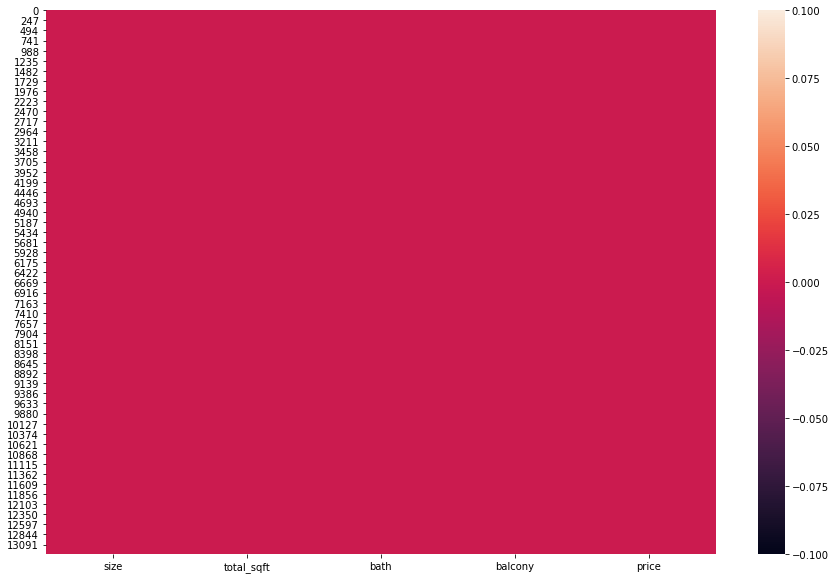

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.isnull())

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ["size", "total_sqft"]
le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [30]:
df2.head()

,size,total_sqft,bath,balcony,price
0,13,70,2.0,1.0,39.07
1,19,1288,5.0,3.0,120.00
2,16,514,2.0,3.0,62.00
3,16,602,3.0,1.0,95.00
4,13,239,2.0,1.0,51.00


# feature scalling

In [38]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler()

X = sc.fit_transform( df2.drop(columns=['price'], axis=1))
X

array([[0.43333333, 0.03308129, 0.02564103, 0.33333333],
       [0.63333333, 0.60869565, 0.1025641 , 1.        ],
       [0.53333333, 0.24291115, 0.02564103, 1.        ],
       ...,
       [0.43333333, 0.08128544, 0.02564103, 0.33333333],
       [0.6       , 0.79395085, 0.07692308, 0.33333333],
       [0.        , 0.82561437, 0.        , 0.33333333]])

In [39]:
y = sc.fit_transform( df2['price'].values.reshape(df2.shape[0],1))
y

array([[0.00864978],
       [0.0311804 ],
       [0.01503341],
       ...,
       [0.01447661],
       [0.13363029],
       [0.00250557]])

#  Implemention of stochastic gradient descent

In [54]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
   
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X,y.reshape(y.shape[0],),100000)
w_sgd, b_sgd, cost_sgd

(array([0.90434842, 0.92168863, 0.99085544, 0.8915039 ]),
 -0.18495798817324968,
 0.3257635435245925)

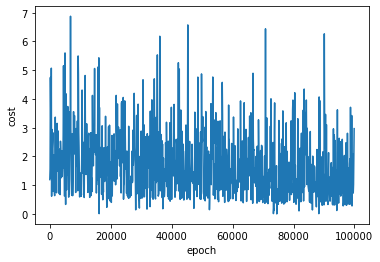

In [55]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

#  Implemention of Minibatch gradient descent

In [50]:
def minibatch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
  
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] 
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) 
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = minibatch_gradient_descent(X,y.reshape(y.shape[0],),500)
w, b, cost

(array([0.53465884, 0.36827404, 0.93222972, 0.32882685]),
 -0.6012981251164868,
 0.029656102919554717)

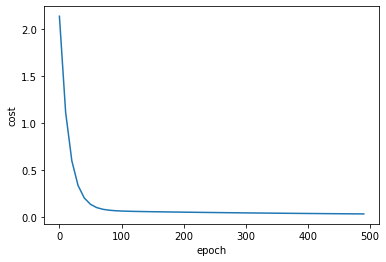

In [51]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
